In [6]:
%pylab inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [7]:
appearance = pd.read_csv("Appearances.csv")
master = pd.read_csv("Master.csv")

print appearance

       yearID teamID lgID   playerID  G_all     GS  G_batting  G_defense  G_p  \
0        1871    BS1  NaN  barnero01   31.0    NaN         31       31.0    0   
1        1871    BS1  NaN  barrofr01   18.0    NaN         18       18.0    0   
2        1871    BS1  NaN  birdsda01   29.0    NaN         29       29.0    0   
3        1871    BS1  NaN   conefr01   19.0    NaN         19       19.0    0   
4        1871    BS1  NaN  gouldch01   31.0    NaN         31       31.0    0   
5        1871    BS1  NaN  jackssa01   16.0    NaN         16       16.0    0   
6        1871    BS1  NaN  mcveyca01   29.0    NaN         29       29.0    0   
7        1871    BS1  NaN  schafha01   31.0    NaN         31       31.0    0   
8        1871    BS1  NaN  spaldal01   31.0    NaN         31       31.0   31   
9        1871    BS1  NaN  wrighge01   16.0    NaN         16       16.0    0   
10       1871    BS1  NaN  wrighha01   31.0    NaN         31       31.0    9   
11       1871    CH1  NaN  b

In [8]:
# See how much blank values are in each data set
print appearance.isnull().sum()
print master.isnull().sum()

yearID           0
teamID           0
lgID           737
playerID         0
G_all          203
GS           51921
G_batting        0
G_defense      203
G_p              0
G_c              0
G_1b             0
G_2b             0
G_3b             0
G_ss             0
G_lf             0
G_cf             0
G_rf             0
G_of             0
G_dh         51718
G_ph         51718
G_pr         58006
dtype: int64
playerID           0
birthYear        145
birthMonth       315
birthDay         472
birthCountry      73
birthState       614
birthCity        200
deathYear       9364
deathMonth      9365
deathDay        9366
deathCountry    9366
deathState      9420
deathCity       9370
nameFirst         40
nameLast           0
nameGiven         40
weight           872
height           809
bats            1190
throws           979
debut            190
finalGame        190
retroID           54
bbrefID            1
dtype: int64


In [9]:
# Count how many times year shows up in Appearance dataset
group_appearance = appearance.groupby('yearID', as_index = False).count()
group_appearance.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,115,0,115,115,0,115,115,115,115,...,115,115,115,115,115,115,115,0,0,0
1,1872,156,0,156,156,0,156,156,156,156,...,156,156,156,156,156,156,156,0,0,0
2,1873,125,0,125,125,0,125,125,125,125,...,125,125,125,125,125,125,125,0,0,0
3,1874,123,0,123,123,0,123,123,123,123,...,123,123,123,123,123,123,123,0,0,0
4,1875,218,0,218,218,0,218,218,218,218,...,218,218,218,218,218,218,218,0,0,0


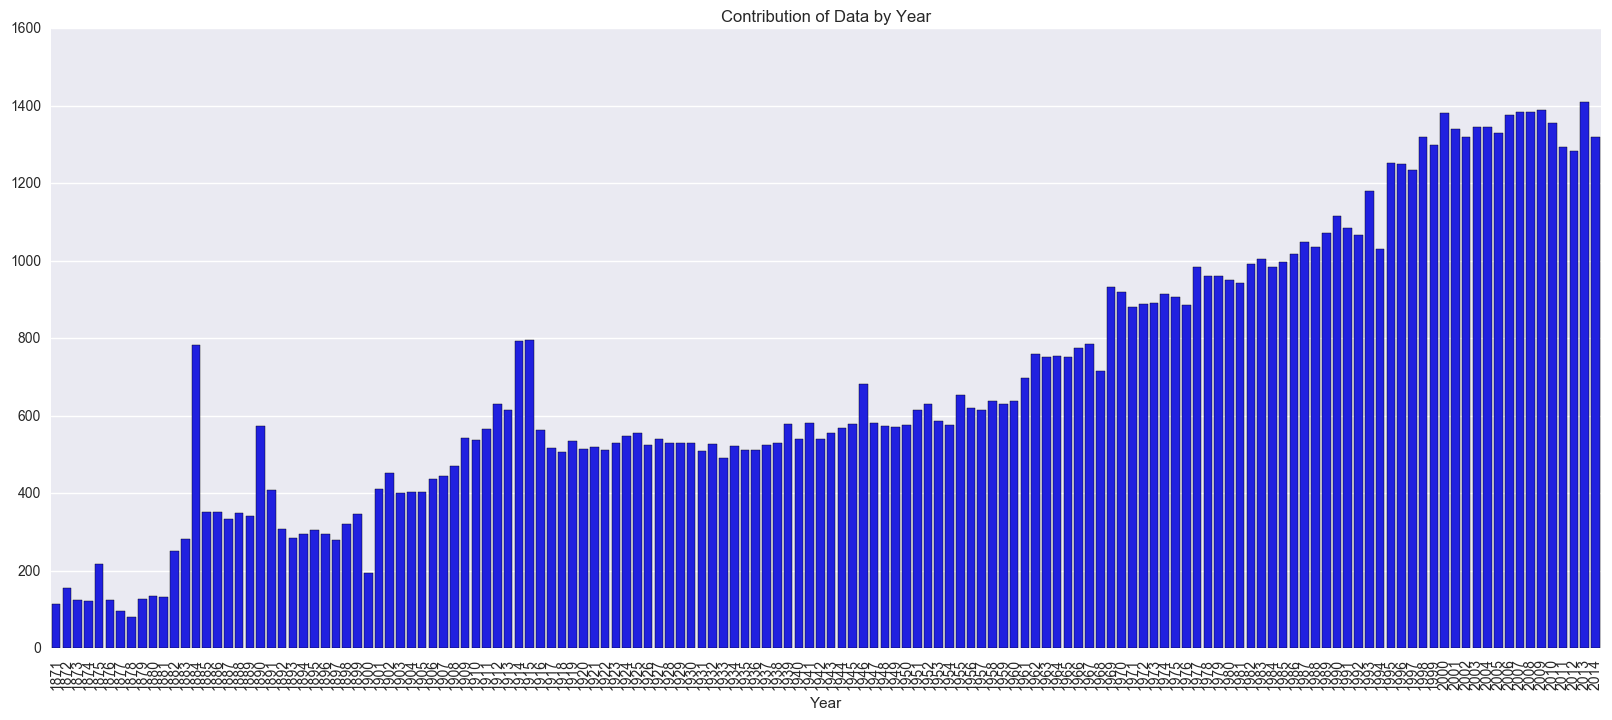

In [10]:
# Show contribution of data by year
sns.set_context(rc={"figure.figsize": (20, 8)})
appearance_plot = sns.barplot('yearID', 'teamID', data = group_appearance, color = 'blue')
appearance_plot.set_xticklabels(group_appearance['yearID'],rotation=90)
appearance_plot.set(xlabel='Year', ylabel='', Title = 'Contribution of Data by Year')
plt.show()

In [11]:
# Clean datasets to remove years before 1903, convert yearID to a string, and create decade
def clean_df(df):
    df = df[(df.yearID >= 1903) & ((df.lgID == 'NL') | (df.lgID == 'AL'))]
    df['yearID'] = df['yearID'].apply(str)
    df['decade'] = (df.yearID.str[:3] + '0')
    return df

In [12]:
mlb_appearance = clean_df(appearance[['yearID','playerID', 'lgID']])

C:\Users\Jeffrey\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jeffrey\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
group_appearance_by_decade = mlb_appearance.groupby(['decade','playerID'], as_index = False).agg('count')
group_appearance_by_decade.head()

,decade,playerID,yearID,lgID
0,1900,abbated01,6,6
1,1900,abbotfr01,3,3
2,1900,ablesha01,2,2
3,1900,abstebi01,2,2
4,1900,adamsba01,3,3


In [14]:
# Add birthCountry to appearance
appearance_with_birth_country = group_appearance_by_decade[['decade','playerID']].merge(
    master[['playerID','birthCountry']], on = 'playerID')
appearance_with_birth_country = appearance_with_birth_country.fillna('Unknown')
appearance_with_birth_country['isIntCountry'] = appearance_with_birth_country.birthCountry != 'USA' 

In [15]:
group_appearance_country = appearance_with_birth_country.groupby(['decade', 'isIntCountry'], as_index = False).agg('count')
group_appearance_country.head()

,decade,isIntCountry,playerID,birthCountry
0,1900,False,1086,1086
1,1900,True,50,50
2,1910,False,1823,1823
3,1910,True,57,57
4,1920,False,1647,1647


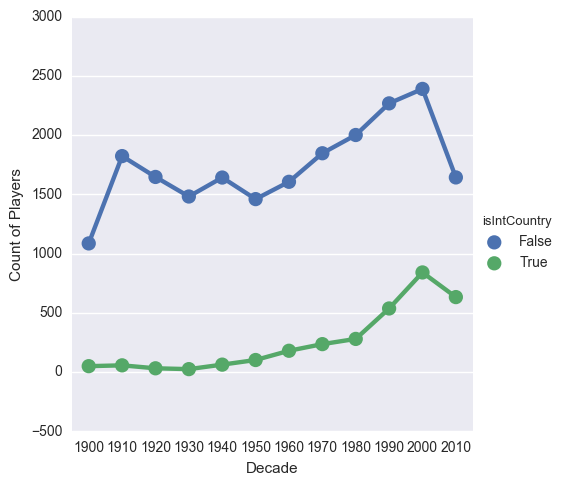

In [16]:
appearance_chart = sns.factorplot('decade', 'playerID', data = group_appearance_country, ci = 0,
                                 hue = 'isIntCountry', size = 5)
appearance_chart.set(xlabel='Decade', ylabel='Count of Players')

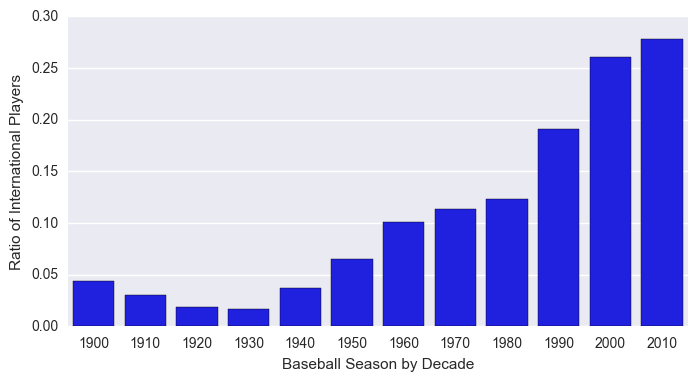

In [17]:
# Plot ratio of international by decade
sns.set_context(rc={"figure.figsize": (8, 4)})
int_player_chart = sns.barplot('decade', 'isIntCountry', data = appearance_with_birth_country,
            estimator = mean, color = 'blue', ci = 0)
int_player_chart.set(xlabel='Baseball Season by Decade', ylabel='Ratio of International Players')
plt.show()

In [18]:
x90_to_10_country_df = appearance_with_birth_country[(appearance_with_birth_country['decade'] >= '1990')
                                                    & appearance_with_birth_country['isIntCountry']]
group_90_to_10_country_df = x90_to_10_country_df.groupby(['decade','birthCountry'], as_index = False).sum()
if(group_90_to_10_country_df['decade'].any() == '2010'):
    group_90_to_10_country_df['avgPlayerByDecade'] = group_90_to_10_country_df['isIntCountry'] / 5
else:
    group_90_to_10_country_df['avgPlayerByDecade'] = group_90_to_10_country_df['isIntCountry'] / 10
group_90_to_10_country_df = group_90_to_10_country_df.sort_values(['decade','birthCountry'], ascending = [1,1])
group_90_to_10_country_df.head()

,decade,birthCountry,isIntCountry,avgPlayerByDecade
0,1990,Afghanistan,1.0,0.1
1,1990,Aruba,4.0,0.4
2,1990,Australia,8.0,0.8
3,1990,Belgium,1.0,0.1
4,1990,Belize,1.0,0.1


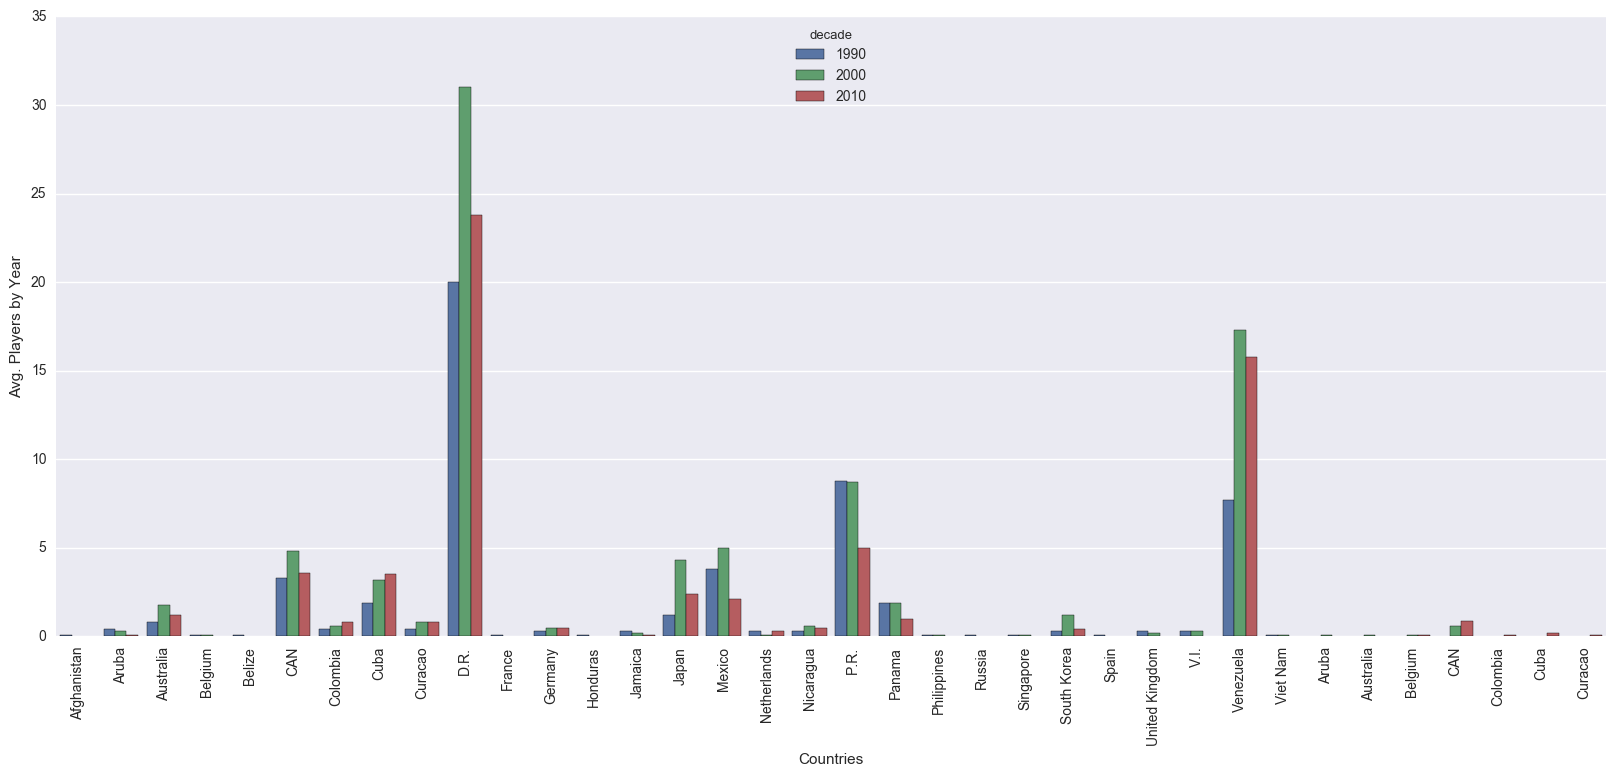

In [19]:
sns.set_context(rc={"figure.figsize": (20, 8)})
g = sns.barplot(y = 'avgPlayerByDecade',x = 'birthCountry', data = group_90_to_10_country_df, estimator = sum,
                hue = 'decade', ci = 0) 
g.set(ylabel = 'Avg. Players by Year', xlabel = 'Countries')
g.set_xticklabels(group_90_to_10_country_df['birthCountry'],rotation=90)
plt.show()